In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')
df['TotalCharges'] = df['TotalCharges'].astype("float")

#replacing blanks with 0 and no total charges are recorded

In [ ]:
df.info()

In [ ]:
df.isnull().sum().sum()

In [ ]:
df.describe()

In [ ]:
df['customerID'].duplicated().sum()

#we have added senior citizen's value 0 & 1 to Yes/No

In [ ]:
def conv(value):
    if value == 1:
        return 'Yes'
    else:
        return 'No'

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)
df.head(10)

In [ ]:
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title('Count of customers by Churn')
plt.show()

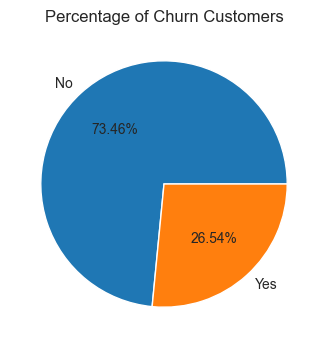

In [26]:
plt.figure(figsize=(4,4))
gb = df.groupby('Churn').agg({'Churn': 'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct='%1.2f%%')
plt.title('Percentage of Churn Customers')
plt.show()

#from the given pie chart we can conclude that 26.54% of our customers have churned out.#now lets explore the reason behind

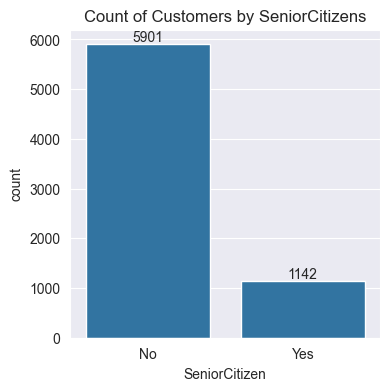

In [24]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = 'SeniorCitizen', data = df)
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by SeniorCitizens')
plt.show()

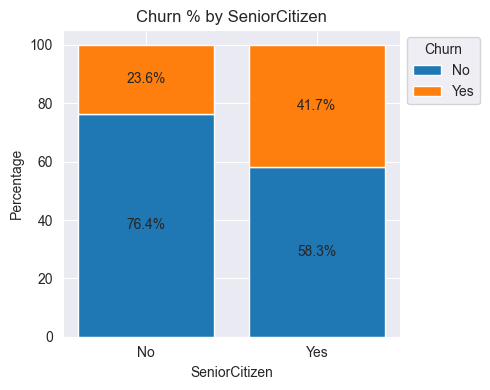

In [25]:
# Step 1: Create a crosstab of SeniorCitizen vs Churn
counts = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Step 2: Convert to percentages (row-wise)
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Step 3: Plot
fig, ax = plt.subplots(figsize=(5, 4))

bottom = [0] * len(percentages)

for churn_value in counts.columns:
    ax.bar(
        percentages.index,
        percentages[churn_value],
        bottom=bottom,
        label=churn_value
    )

    # Add text labels
    for i, val in enumerate(percentages[churn_value]):
        if val > 0:
            ax.text(i, bottom[i] + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=10)

    bottom = [i + j for i, j in zip(bottom, percentages[churn_value])]

# Step 4: Final touches
ax.set_title('Churn % by SeniorCitizen')
ax.set_xlabel('SeniorCitizen')
ax.set_ylabel('Percentage')
ax.legend(title='Churn', bbox_to_anchor=(1, 1))
plt.xticks([0, 1], ['No', 'Yes'])  # Assuming 0 = No, 1 = Yes
plt.tight_layout()
plt.show()

#comparative a greater percentage of people in senior citizen category have churned

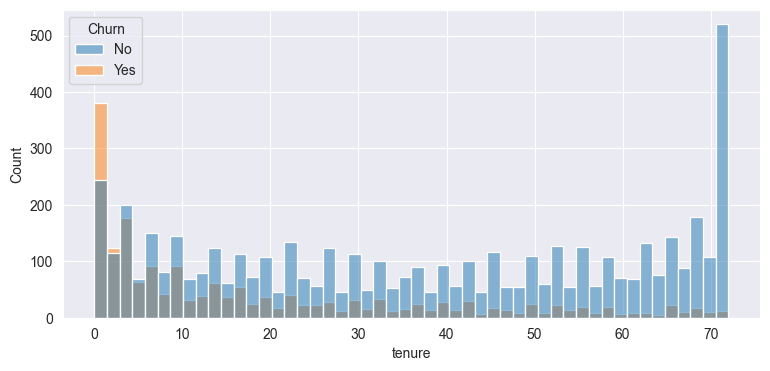

In [28]:
plt.figure(figsize=(9,4))
sns.histplot(x= 'tenure', data = df, bins = 50, hue = 'Churn')
plt.show()

#people who have used our services for a long time have stayed and people who have used our services #1 and 2 months are churned

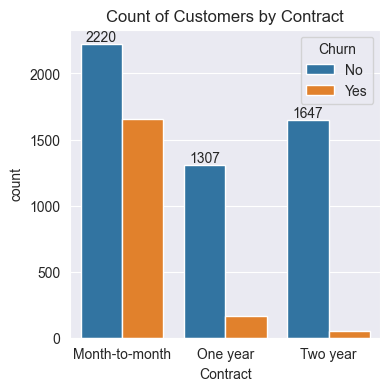

In [30]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = 'Contract', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Contract')
plt.show()

#people who have month to month contract are likely to churn then from those who have 1 or 2 years of contract

In [32]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

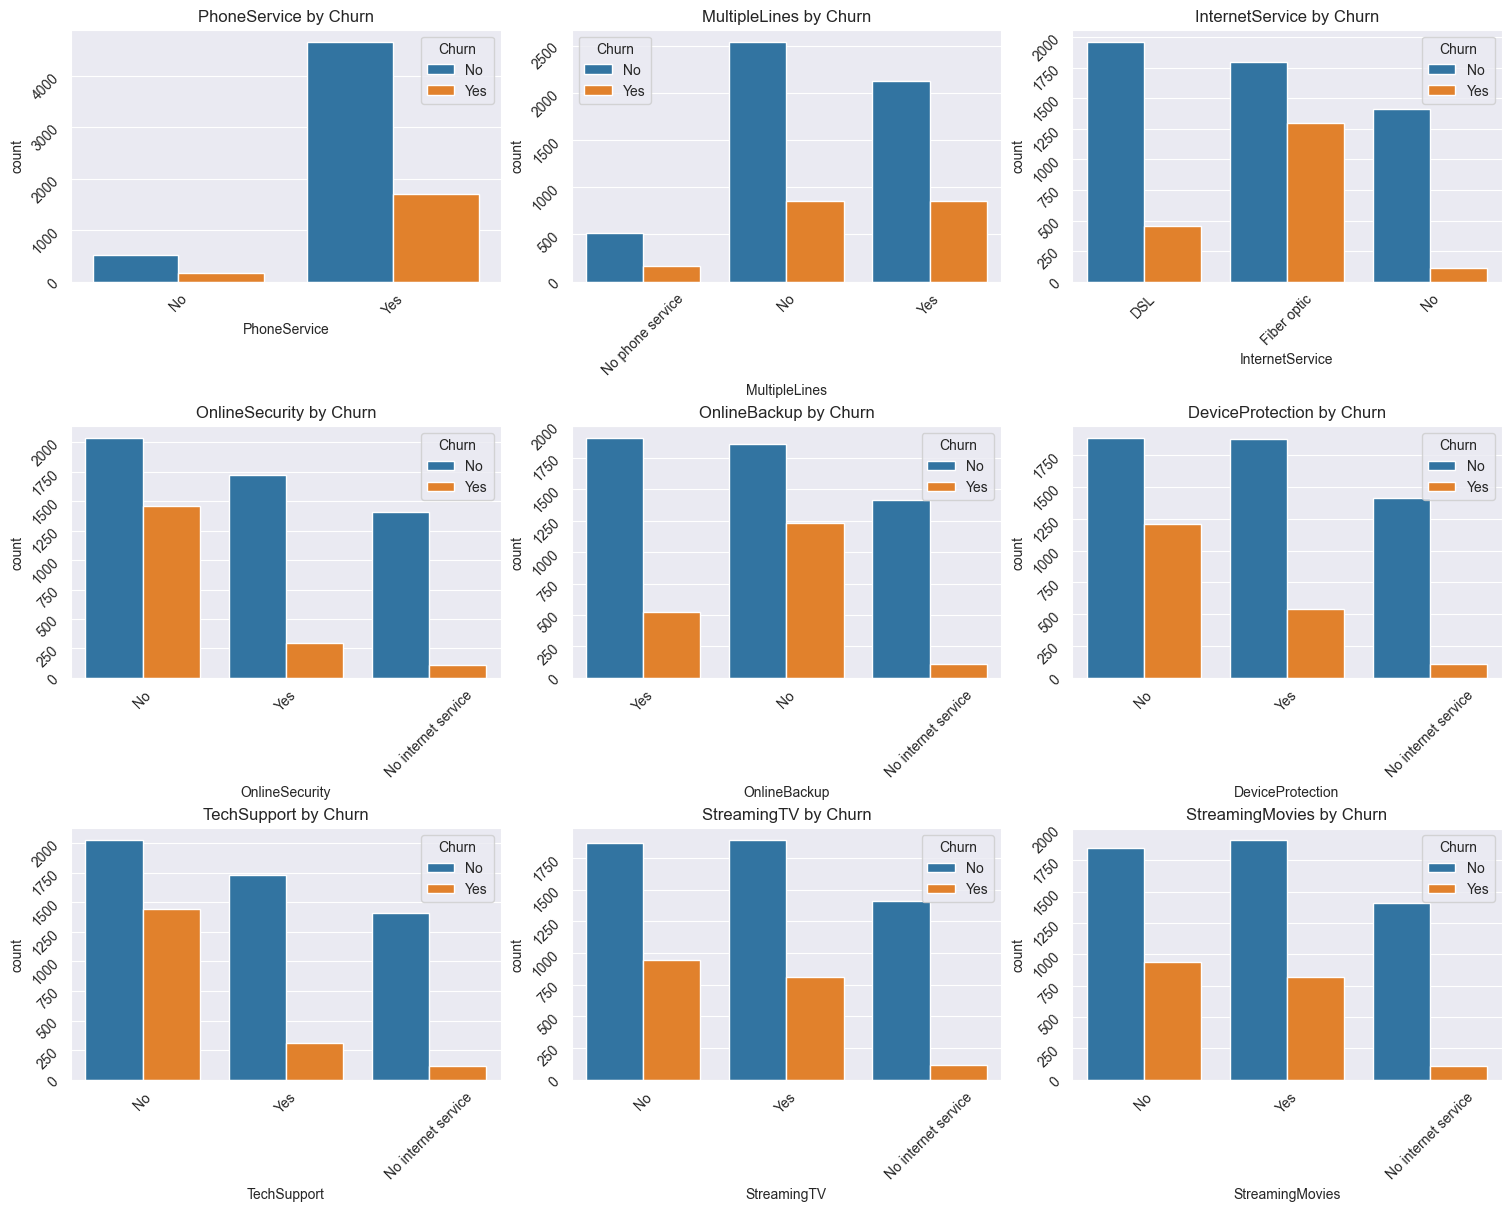

In [33]:
service_cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

n = len(service_cols)
ncols = 3
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows), constrained_layout=True)
axes = axes.flatten()

for ax, col in zip(axes, service_cols):
    sns.countplot(x=col, hue='Churn', data=df, ax=ax, palette=['#1f77b4','#ff7f0e'])
    ax.set_title(f'{col} by Churn')
    ax.legend(title='Churn')
    ax.tick_params(rotation=45)

# Turn off any unused subplots
for ax in axes[len(service_cols):]:
    ax.axis('off')

plt.show()


#Fiber optic users churn more than DSL or no internet, with DSL having moderate churn and no internet the lowest.
#Subscribers of add-on services (security, backup, device protection, tech support, streaming) churn less than non-subscribers.
#Multiple-line customers churn slightly more than single-line, and those without PhoneService show minimal churn. 

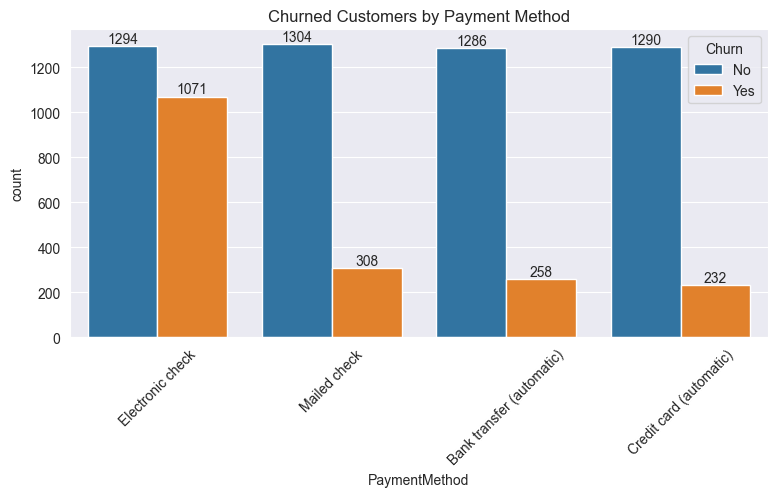

In [39]:
plt.figure(figsize=(9,4))
ax = sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churned Customers by Payment Method')
plt.xticks(rotation=45)
plt.show()

#customer is likely to churn when he is using electronic check as a payment method